# Gráficos de datos de corpus

**2023-nov**

Actualizar los gráficos de los datos usados en el corpus de audio en la sección Corpus (https://dila-ling.github.io/pict-glotales/corpus/).

- notebook primera versión plots: [conteos-informe-2022.ipynb](../PICT-20161038/conteos-informe-2022.ipynb)
- datos viejos:
    - audio: [audiofiles_info.csv](../pict-glotales/_data/audiofiles_info.csv)
    - texto: [textfiles_info.csv](../pict-glotales/_data/textfiles_info.csv)
- datos actualizados: planilla audiofiles_info https://docs.google.com/spreadsheets/d/1m0vsL9V8f2yj5zs0MFmL2p9yyQfjOXVom4FGETKeRiM/edit#gid=1092712039
- gráficos: 
    - [corpus_dur_by_lang_audio.png](../pict-glotales/assets/plots/corpus_dur_by_lang_audio.png)
    - [corpus_pags_by_lang_text.png](../pict-glotales/assets/plots/corpus_pags_by_lang_text.png)



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Acá están los datos y el código para graficar los datos textuales en junio de 2022:

In [9]:
old = pd.read_csv("../pict-glotales/_data/textfiles_info.csv")
old.head(5)

,Archivo,Lengua,Codigo,Tamano,Paginas,Lineas,Palabras,Cita,Referencia
0,Carol_2014_EsbozoFonologico.pdf,chorote,C2014a,1.6,31.0,2.3k,13.2k,"Carol, 2014a","Carol, (2014). Esbozo fonológico del chorote (..."
1,Carol_Tesis_2014.pdf,chorote,C2014b,3.9,469.0,29k,154k,"Carol, 2014b",Lengua chorote (Mataguayo). Estudio descriptiv...
2,DraysonDiccionarioChoroteCastellano.pdf,chorote,D1999,5.7,271.0,5.2k,90.4k,"Drayson, 2009","Drayson, Nicholas. (2009). Niwak Samtis. Dicci..."
3,Gerzenstein_1978-tomo1.pdf,chorote,G1978,1.4,75.0,73.4k,78k,"Gerzenstein, 1978","Gerzenstein, Ana. (1978) Lengua chorote. Tomo ..."
4,Gerzenstein_1979-tomo2.pdf,chorote,G1979,3.3,42.0,21.7k,21.4k,"Gerzenstein, 1979","Gerzenstein, Ana. (1979) Lengua chorote. Tomo ..."


```
totales = textos_info[['Lengua', 'Páginas', 'Cita']].groupby(['Lengua', 'Cita']).sum()
totales = totales.reset_index()
totales = totales.rename(columns={'Cita':'Fuente'})
totales = totales.pivot_table(index="Lengua", columns="Fuente", values="Páginas").fillna(0)

sns.set_style("ticks")

#paleta = ['#69bf79', '#bf6980', '#a069bf', '#bfaf69' ]
paleta = sns.color_palette("husl", 17)

ax = totales.plot.barh(color = paleta, stacked=True)
ax.set_xlabel("Cantidad de páginas", labelpad=15)
ax.set_ylabel("Lengua", labelpad=15)

sns.set(rc = {'figure.figsize':(14,8)})

sns.despine()

plt.tight_layout()

plt.savefig('plots/corpus_pags_by_lang_text.png')
```

Si miramos los datos de audio de junio 2022, me falta la info de Cita, la debo haber repuesto a partir de la columna de Código:

In [10]:
old = pd.read_csv("../pict-glotales/_data/audiofiles_info.csv")
old.head(5)

,Archivo,Lengua,Palabras,Dur,Lineas,Comentario,Transcriptorx,Tanda,Fuente,Codigo
0,BUCCA_A_02A-chorote,chorote,72.0,9.0,243.0,sin nºpag. no todas son glotales,NH,2019-06,DILA repo,B1969
1,cinta01_A,chorote,130.0,31.0,2396.0,fuentes PP y D1999,GG,2019-06,DILA inv,PP2005
2,cinta01_B_1,chorote,29.0,5.0,582.0,fuentes PP y D1999,GG,2019-06,DILA inv,PP2005
3,CRT001R007I001,chorote,98.0,38.0,2133.0,NaN,SM,2020-02,AILLA,G1968
4,CRT001R007I002,chorote,101.0,20.0,1777.0,NaN,SM,2019-06,AILLA,G1968


A partir de los datos de acá, actualizo la planilla vieja de [PICT_Glotales_DILA/audiofiles_info](https://docs.google.com/spreadsheets/d/1m0vsL9V8f2yj5zs0MFmL2p9yyQfjOXVom4FGETKeRiM/edit#gid=1092712039)

## Actualización de datos de corpus de audio

In [11]:
sheet = "https://docs.google.com/spreadsheets/d/1GtliM_yutOBnWaferOmQjVNLt_xOxz56rst6ZR9MkXc/edit#gid=1308046217" ## CAICYT
sheet = "palabras_en_comun_audios.csv" ## BELERIAND

new = pd.read_csv(sheet)
new.head(5)

,Palabra,Lengua,Español,Recorte,Archivo,Formato,Inicio (sg),Fin (sg),Código,Cita Audio,...,Cita Bibliográfica,Herramienta,Transcriptorx,Tanda,Revisorx,Fuente,Consultante,Comunidad,Latitud,Longitud
0,ɬokʲe,chorote,flor,ch_xlokje,BUCCA_A_02A-chorote,mp3,192.746547,193.744485,B1969,"Bucca, 1969",...,"Bucca, Salvador. “Elicitaciones en lenguas cho...",Audacity,NH,2019-06,AG,DILA repo,Manuel González,"Misión La Paz, Santa Victoria Este, Salta",-22.368465,-62.561983
1,ɬawa,nivacle,flor,ni_lhavo,BUCCA_A_02A-nivacle,mp3,14.692968,15.58418,B1969,"Bucca, 1969",...,"Bucca, Salvador. “Elicitaciones en lenguas cho...",Audacity,NH,2019-06,AG,DILA repo,José Ampú,"Misión La Paz, Santa Victoria Este, Salta",-22.368465,-62.561983
2,ɬawoʔ,wichi,flor,wi_lhaawo,BUCCA_A_02A-wichi,mp3,69.969004,70.856474,B1969,"Bucca, 1969",...,"Bucca, Salvador. “Elicitaciones en lenguas cho...",Audacity,NH,2019-06,AG,DILA repo,Wilfredo Ibarra,"Misión La Paz, Santa Victoria Este, Salta",-22.368465,-62.561983
3,ɬop'om,maka,flor,ma_lh_op_om,MCA001R024I002,wav,222.903,223.945,G1985,"Gerzenstein, 1985",...,"Gerzenstein, Ana. (1985). Elicitación. Texas, ...",Transcriber,MD,2019-06,AG,AILLA,"T'semhej, Andrés","Asunción, Paraguay",-25.296674,-57.680663
4,ɬaʔa,chorote,fruta,ch_lha_a,BUCCA_A_02A-chorote,mp3,116.010337,116.77192,B1969,"Bucca, 1969",...,"Bucca, Salvador. “Elicitaciones en lenguas cho...",Audacity,NH,2019-06,AG,DILA repo,Manuel González,"Misión La Paz, Santa Victoria Este, Salta",-22.368465,-62.561983


No se incorporaron archivos nuevos de chorote, maká ni wichí, únicamente audios nuevos para nivaclé:

In [21]:
new[['Archivo', 'Lengua', 'Cita Audio', 'Cita Bibliográfica', 'Tanda']][new['Tanda'] == '2023-08'].drop_duplicates()

,Archivo,Lengua,Cita Audio,Cita Bibliográfica,Tanda
39,CRT001R007I001,chorote,"Gerzenstein, 1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",2023-08
41,CRT001R007I001,chorote,"Gerzenstein,1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",2023-08
46,CRT001R007I002,chorote,"Gerzenstein, 1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",2023-08
48,CRT001R031I001,chorote,"Gerzenstein, 1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",2023-08
60,CRT001R032I001,chorote,"Gerzenstein, 1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",2023-08
71,MCA001R024I001,maka,"Gerzenstein, 1985","Gerzenstein, Ana. (1985). Elicitación. Texas, ...",2023-08
88,MCA001R015I001,maka,"Gerzenstein, 1984","Gerzenstein, Ana. (1984). Elicitación. Texas, ...",2023-08
89,MCA001R024I002,maka,"Gerzenstein, 1985","Gerzenstein, Ana. (1985). Elicitación. Texas, ...",2023-08
90,CRT001R031I001,chorote,"Gerzenstein, 1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",2023-08
92,2010_07_01_SR_AG_002,nivacle,"Gutiérrez, 2010","Gutiérrez, Analía (2010) Trabajo de campo sobr...",2023-08


In [32]:
new[['Archivo', 'Cita Audio', 'Cita Bibliográfica']][new['Tanda'] == '2023-08'].drop_duplicates()[new['Lengua']== 'nivacle']

/home/yoki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Archivo,Cita Audio,Cita Bibliográfica
92,2010_07_01_SR_AG_002,"Gutiérrez, 2010","Gutiérrez, Analía (2010) Trabajo de campo sobr..."
93,20120308_FR_AG_070,"Gutiérrez, 2012","Gutiérrez, Analía (2012) Trabajo de campo sobr..."
94,20120308_FR_AG_069,"Gutiérrez, 2012","Gutiérrez, Analía (2012) Trabajo de campo sobr..."
95,20170709_TS_AG_069,"Gutiérrez, 2011","Gutiérrez, Analía (2011) Trabajo de campo sobr..."
96,20120505_FR_AG_063,"Gutiérrez, 2012","Gutiérrez, Analía (2012) Trabajo de campo sobr..."
97,2010_08_14_SR_AG_020,"Gutiérrez, 2010","Gutiérrez, Analía (2010) Trabajo de campo sobr..."
98,2010_08_24_FR_AG_211,"Gutiérrez, 2012","Gutiérrez, Analía (2012) Trabajo de campo sobr..."
99,2017_04_04_FR_AG_087,"Gutiérrez, 2017","Gutiérrez, Analía (2017) Trabajo de campo sobr..."
100,2010_08_21_FR_AG_052,"Gutiérrez, 2010","Gutiérrez, Analía (2010) Trabajo de campo sobr..."
101,2012_05_04_GR_AG_037,"Gutiérrez, 2012","Gutiérrez, Analía (2012) Trabajo de campo sobr..."


Los copio a mano a la planilla [PICT_Glotales_DILA/audiofiles_info](https://docs.google.com/spreadsheets/d/1m0vsL9V8f2yj5zs0MFmL2p9yyQfjOXVom4FGETKeRiM/edit#gid=1092712039)

Reunión con AG miércoles 8 nov:
- sólo vamos a calcular la duración para las campañas 2017 y 2019 (años cuebiertos por el proyecto)
- calculamos la duración de todos los audios de la campaña, no sólo los seleccionados para la sección de Resultados


PENDIENTE:
- CALCULAR DURACIÓN DE CADA AUDIO
- GENERAR EL GRÁFICO

In [ ]:
! total=0

In [ ]:
! for fi in `cat fnames-audios-nivacle-2023-08.lst`; do d=$(soxi -D $fi); ((total += d)); done; echo "Total : $total  seconds"

Total : 67713.686381000065  seconds

In [2]:
total_2017_2019_sg =  67713.686381000065
print(f"La suma de los audios de 2017 y 2019 es de {total_2017_2019_sg/60/60} horas")
print(f"La suma de los audios de 2017 y 2019 es de {total_2017_2019_sg/60} minutos")

La suma de los audios de 2017 y 2019 es de 18.809357328055572 horas
La suma de los audios de 2017 y 2019 es de 1128.5614396833344 minutos


TCFiladelfiaAudios2017 Total : 123287.15743400023  seconds


TCFiladelfiaAudios2019 Total : 135427.37276200028 seconds


In [8]:
print(f"La suma de los audios de 2017 es de {round(123287.15743400023/60)} minutos")

La suma de los audios de 2017 es de 2055 minutos


In [7]:
print(f"La suma de los audios de 2019 es de {round(135427.37276200028/60)} minutos")

La suma de los audios de 2019 es de 2257 minutos


## Generación del gráfico

In [13]:
sheet = "https://docs.google.com/spreadsheets/d/1m0vsL9V8f2yj5zs0MFmL2p9yyQfjOXVom4FGETKeRiM/export?gid=1092712039&format=csv" ## CAICYT
#sheet = "palabras_en_comun_audios.csv" ## BELERIAND

new_audio_data = pd.read_csv(sheet)
new_audio_data.head(5)

,Archivo,Formato,Lengua,Palabras,Duración (min),Líneas,Comentario,Herramienta,Transcriptorx,Tanda,Fuente,Código,Cita,Referencia,Soporte,Tipo,Verificado
0,BUCCA_A_02A-chorote,mp3,chorote,72.0,9,243.0,sin nºpag. no todas son glotales,Audacity,NH,2019-06,DILA repo,B1969,"Bucca, 1969","Bucca, Salvador. “Elicitaciones en lenguas cho...",audio,elicitación,1.0
1,cinta01_A,wav,chorote,130.0,31,2396.0,fuentes PP y D1999,Transcriber,GG,2019-06,DILA inv,PP2005,"Pacor, 2005","Pacor, Paola. (2005). Trabajo de campo lengua ...",audio,elicitación,1.0
2,cinta01_B_1,wav,chorote,29.0,5,582.0,fuentes PP y D1999,Transcriber,GG,2019-06,DILA inv,PP2005,"Pacor, 2005","Pacor, Paola. (2005). Trabajo de campo lengua ...",audio,elicitación,1.0
3,CRT001R007I001,wav,chorote,98.0,38,2133.0,NaN,Transcriber,SM,2020-02,AILLA,G1968,"Gerzenstein,1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",audio,elicitación,1.0
4,CRT001R007I002,wav,chorote,101.0,20,1777.0,NaN,Transcriber,SM,2019-06,AILLA,G1968,"Gerzenstein,1968","Gerzenstein, Ana. (1968) ""Palabras en Chorote""...",audio,elicitación,1.0


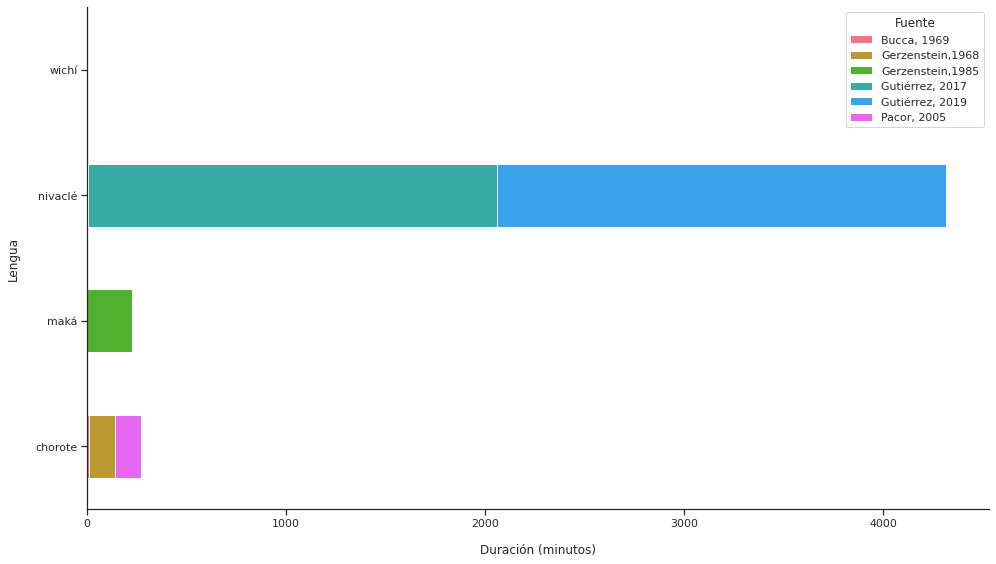

In [17]:
totales = new_audio_data[['Lengua', 'Duración (min)', 'Cita']].groupby(['Lengua', 'Cita']).sum()
totales = totales.reset_index()
totales = totales.rename(columns={'Cita':'Fuente'})
totales = totales.pivot_table(index="Lengua", columns="Fuente", values="Duración (min)").fillna(0)

sns.set_style("ticks")

#paleta = ['#69bf79', '#bf6980', '#a069bf', '#bfaf69' ]
paleta = sns.color_palette("husl", 6)

ax = totales.plot.barh(color = paleta, stacked=True)
ax.set_xlabel("Duración (minutos)", labelpad=15)
ax.set_ylabel("Lengua", labelpad=15)

sns.set(rc = {'figure.figsize':(14,8)})

sns.despine()

plt.tight_layout()

plt.savefig('corpus_pags_by_lang_text.png')